### What is an outlier?
An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

<img src="images/point_outlier.png">


### What is the reason for an outlier to exists in a dataset?

1. Data entry errors (human errors)
2. Measurement errors (instrument errors)
3. Experimental errors (data extraction or experiment planning/executing errors)
4. Intentional (dummy outliers made to test detection methods)
5. Data processing errors (data manipulation or data set unintended mutations)
6. Sampling errors (extracting or mixing data from wrong or various sources)
7. Natural (not an error, novelties in data)

### What are the criteria to identify an outlier?

1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
2. Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation
3. AI models

### What are the impacts of having outliers in a dataset?

1. It causes various problems during our statistical analysis
2. It may cause a significant impact on the mean and the standard deviation

### Various ways of finding the outlier.
1. using z score
2. using the IQR interquantile range
3. Using scatter plots
4. Using box plots


## Detecting outlier using Z score

### Using Z score

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset= np.array([11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10])

In [3]:
len(dataset)

34

In [4]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [5]:
outlier_pt=detect_outliers(dataset)
outlier_pt

[102, 107, 108]

In [6]:
sorted(dataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

### Detecting outlier using InterQuantile Range
75%- 25% values in a dataset

Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4. Find lower bound q1*1.5
5. Find upper bound q3*1.5<br>
Anything that lies outside of lower and upper bound is an outlier

In [7]:
sorted(dataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [8]:
quantile1, quantile3 = np.percentile(dataset,[25,75])
print(quantile1,quantile3)

12.0 15.0


In [9]:
iqr = quantile3-quantile1
print(iqr)

3.0


In [10]:
lower_bound = quantile1 -(1.5 * iqr) 
upper_bound = quantile3 +(1.5 * iqr) 
print(lower_bound,upper_bound)

7.5 19.5


In [11]:
mask = (dataset < lower_bound) | (dataset > upper_bound)
outliers = dataset[mask]
outliers

array([102, 107, 108])

### Scatter plot

In [12]:
df = pd.read_csv('data/weight-height.csv')
df.head(20)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [13]:
df.shape

(10000, 3)

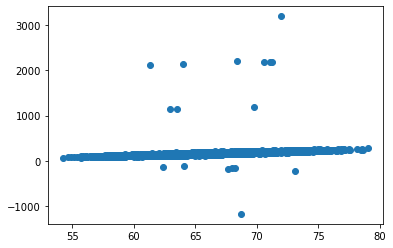

In [14]:
plt.scatter(df['Height'],df['Weight'])

In [15]:
df.loc[10,'Weight'] = 18.604926
df.head(20)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


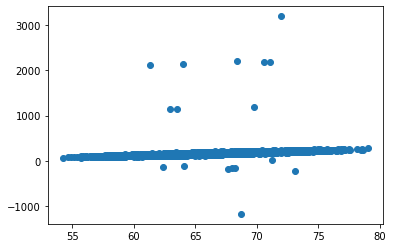

In [16]:
plt.scatter(df['Height'],df['Weight'])


### Box plot
1. The data points out of the lower and upper whiskers are outliers
2. In between the first (lower whisker) and third quartile (upper whisker) of whisker lies the interquartile region
<img src="images/box.png">

In [19]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
iris_data.shape

(150, 4)

In [21]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:

# Preparing Iris dataset
iris_target = pd.DataFrame(data=iris.target, columns=['species'])
iris_df = pd.concat([iris_data, iris_target], axis=1)

iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
# Add species name
iris_df['species_name'] = np.where(iris_df['species'] == 0, 'Setosa', None)
iris_df['species_name'] = np.where(iris_df['species'] == 1, 'Versicolor', 
                                   iris_df['species_name'])
iris_df['species_name'] = np.where(iris_df['species'] == 2, 'Virginica', 
                                   iris_df['species_name'])

iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Virginica
146,6.3,2.5,5.0,1.9,2,Virginica
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica


{'whiskers': [<matplotlib.lines.Line2D at 0x13dab0693c8>,
 'caps': [<matplotlib.lines.Line2D at 0x13dab071948>,
 'boxes': [<matplotlib.lines.Line2D at 0x13dab069d08>,
 'medians': [<matplotlib.lines.Line2D at 0x13dab071e88>,
 'fliers': [<matplotlib.lines.Line2D at 0x13dab071ec8>,
 'means': []}

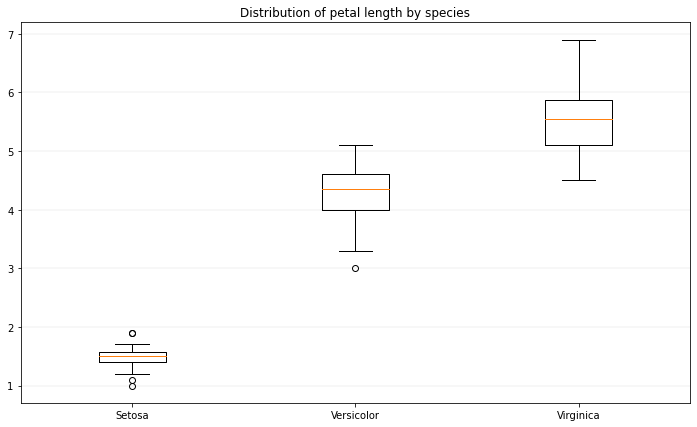

In [24]:
# Prepare petal length by species datasets
setosa_petal_length = iris_df[iris_df['species_name'] == 'Setosa']['petal_length']
versicolor_petal_length = iris_df[iris_df['species_name'] == 'Versicolor']['petal_length']
virginica_petal_length = iris_df[iris_df['species_name'] == 'Virginica']['petal_length']

# Visualize petal length distribution for all species
fig, ax = plt.subplots(figsize=(12, 7))

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Distribution of petal length by species')
# Set species names as labels for the boxplot
dataset = [setosa_petal_length, versicolor_petal_length, virginica_petal_length]
labels = iris_df['species_name'].unique()
ax.boxplot(dataset, labels=labels)

#### We can extract a few insights from this plot:
1. Iris Setosa has a much smaller petal length than Iris Versicolor and Virginica. It ranges from approximately 1 to 2 centimeters.
2. The range of petal length of Iris Virginica is bigger than both the ranges of values for Iris Setosa and Versicolor. We can see that from how tall the box is for Iris Virginica compared to the other two.
3. Both Iris Setosa and Veriscolor have outliers.

### Identify outliers from iris dataset using Z score

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In [41]:
setosa_petal_length = np.array(setosa_petal_length)
mean = setosa_petal_length.mean()
std = setosa_petal_length.std()
zscores = np.array([(x-mean)/std for x in setosa_petal_length])
threashold = 1.5
mask = abs(zscores) <= threashold
data = setosa_petal_length[mask]
data


array([1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6,
       1.6, 1.7, 1.7, 1.7, 1.7])

In [37]:
setosa_petal_length.sort()
setosa_petal_length

array([1. , 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4,
       1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6,
       1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.7, 1.9, 1.9])

### Identify outliers from iris dataset using InterQuantile Range
Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4. Find lower bound q1*1.5
5. Find upper bound q3*1.5
Anything that lies outside of lower and upper bound is an outlier

In [44]:
sdata = np.array(setosa_petal_length)
q1_percentile,q3_percentile = np.percentile(sdata,25),np.percentile(sdata,75)
q1_percentile,q3_percentile

(1.4, 1.5750000000000002)

In [45]:
iqr = (q3_percentile-q1_percentile)
lower_bound = (q1_percentile - 1.5*iqr)
upper_bound = (q3_percentile + 1.5*iqr)
lower_bound,upper_bound

(1.1374999999999995, 1.8375000000000006)

In [46]:
sdata = [x for x in sdata if x < lower_bound or x > upper_bound]
sdata

[1.0, 1.1, 1.9, 1.9]